In [1]:
import sys
sys.path.append('../src')

from module.module import Linear
from loss.loss import MSELoss
from networks.optim import Optim
from networks.sequentiel import Sequentiel

from utils.generation import generate_linear_data, generate_data_gauss
from utils.plots import plot_net
from utils.evaluation import accuracy

import numpy as np
import matplotlib.pyplot as plt

## Régression Lineaire : 

100%|██████████| 10/10 [00:00<00:00, 5108.15it/s]


Training completed.


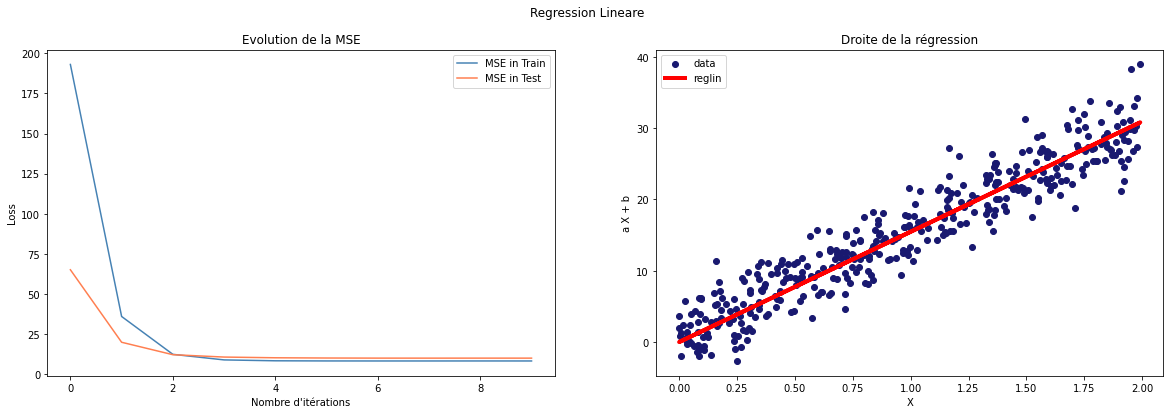

In [2]:
a = 15
b = 1
sigma = 3

data = generate_linear_data(n_samples=400, a=a, b=b, sigma=sigma)

X = data[:, 0]
y = data[:, 1]


net = Sequentiel([
    Linear(1, 1)
], classes_type="multi")

optim = Optim(net, MSELoss(), eps=1e-3)
optim.SGD(X, y, test_train_split=True, batch_size=100, epochs=10, verbose=False)

plot_net(X, y, net, optim.train_loss, test_loss=optim.test_loss, net_type="reglin", net_title="Regression Lineare", loss_name="MSE", data_xlabel="X", data_ylabel="a X + b")

## Classification : 

### 1. Données linéaires : 

100%|██████████| 1000/1000 [00:00<00:00, 9011.99it/s]


Training completed.


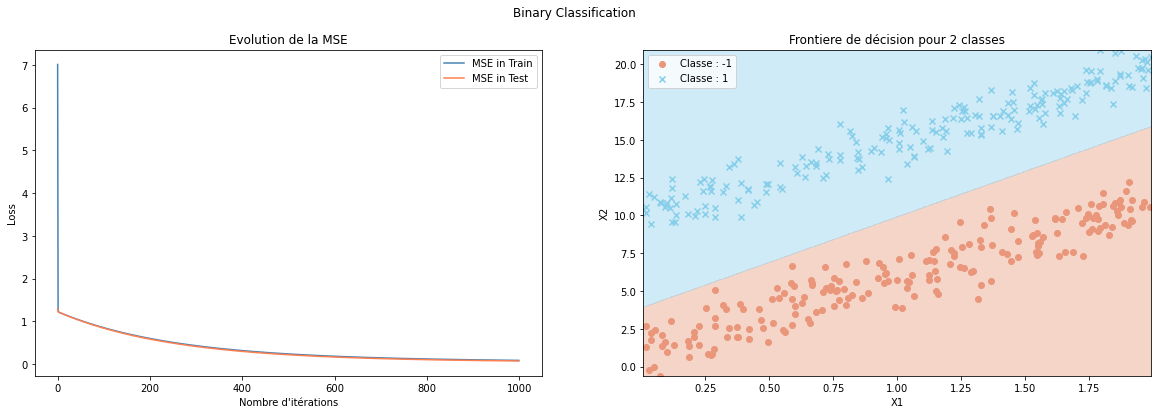

Accuracy : 1.0


In [3]:
a = 5
sigma = 1
n = 200

data_1 = generate_linear_data(n_samples=n, a=a, b=1, sigma=sigma)
data_2 = generate_linear_data(n_samples=n, a=a, b=10, sigma=sigma)

X = np.concatenate([data_1, data_2])
y = np.array([-1] * n + [1] * n)

net = Sequentiel([
    Linear(2, 1, bias=True),
], classes_type="-1/1")

optim = Optim(net, MSELoss(), eps=1e-5)
optim.SGD(X, y, test_train_split=True, batch_size=len(X), epochs=1000, verbose=False)

plot_net(X, y, net, optim.train_loss, test_loss=optim.test_loss, net_type="classif", net_title="Binary Classification", loss_name="MSE", data_xlabel="X1", data_ylabel="X2")
print("Accuracy :", accuracy(net, X, y))

### 2. Données Gaussienne : 

100%|██████████| 1000/1000 [00:00<00:00, 3008.11it/s]


Training completed.


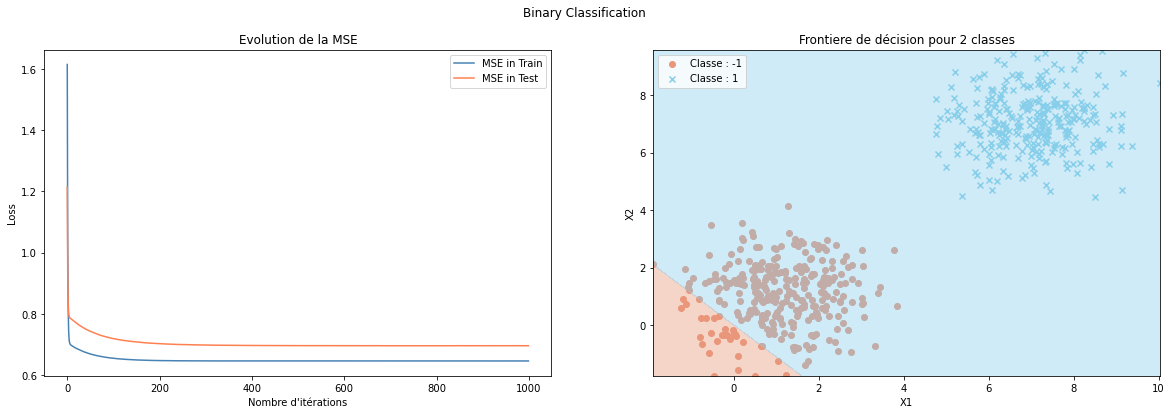

Accuracy : 0.5483333333333333


In [4]:
X, y = generate_data_gauss(300, [[1, 1], [7, 7]], [[[1, 0], [0, 1]]] * 2, labels=[-1, 1])

net = Sequentiel([
    Linear(2, 1, bias=False)
], classes_type="-1/1")

optim = Optim(net, MSELoss(), eps=1e-5)
optim.SGD(X, y, test_train_split=True, batch_size=60, epochs=1000, verbose=False)

plot_net(X, y, net, optim.train_loss, test_loss=optim.test_loss, net_type="classif", net_title="Binary Classification", loss_name="MSE", data_xlabel="X1", data_ylabel="X2")
print("Accuracy :", accuracy(net, X, y))

100%|██████████| 1000/1000 [00:00<00:00, 2455.66it/s]


Training completed.


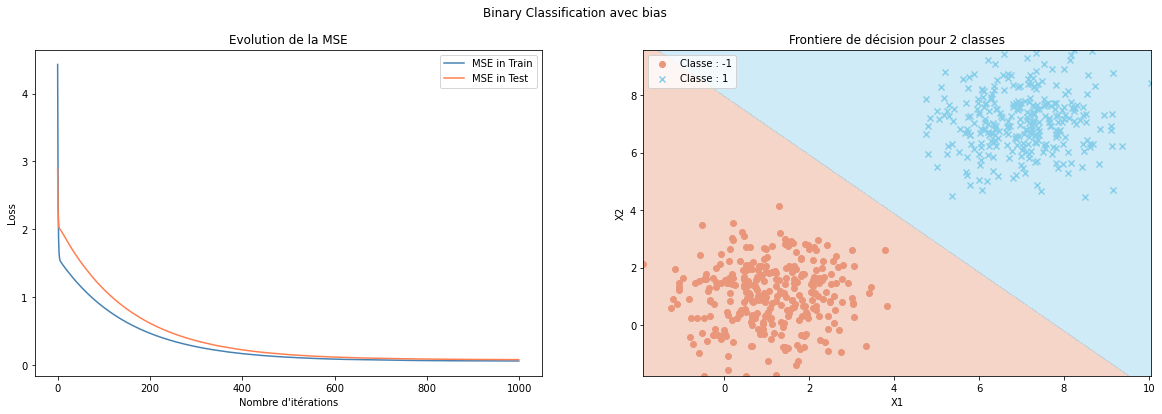

Accuracy : 1.0


In [5]:
net = Sequentiel([
    Linear(2, 1, bias=True)
], classes_type="-1/1")

optim = Optim(net, MSELoss(), eps=1e-5)
optim.SGD(X, y, test_train_split=True, batch_size=60, epochs=1000, verbose=False)

plot_net(X, y, net, optim.train_loss, test_loss=optim.test_loss, net_type="classif", net_title="Binary Classification avec bias", loss_name="MSE", data_xlabel="X1", data_ylabel="X2")
print("Accuracy :", accuracy(net, X, y))

## Non linéaire : XOR 

100%|██████████| 1000/1000 [00:00<00:00, 1128.45it/s]


Training completed.


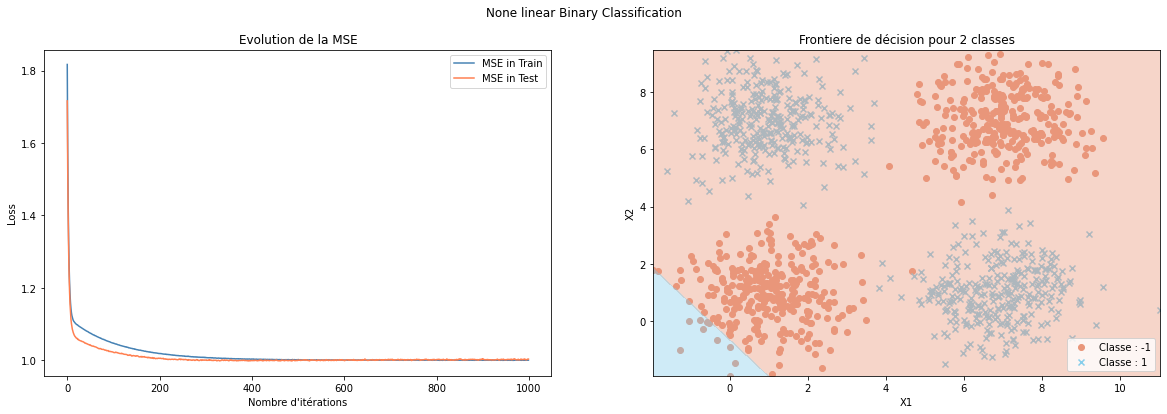

Accuracy : 0.49083333333333334


In [6]:
X, y = generate_data_gauss(300, [[1, 1], [7, 7], [1, 7], [7, 1]], [[[1, 0], [0, 1]]] * 4, labels=[-1, -1, 1, 1])

net = Sequentiel([
    Linear(2, 1, bias=True)
], classes_type="-1/1")

optim = Optim(net, MSELoss(), eps=1e-5)
optim.SGD(X, y, test_train_split=True, batch_size=60, epochs=1000, verbose=False)

plot_net(X, y, net, optim.train_loss, test_loss=optim.test_loss, net_type="classif", net_title="None linear Binary Classification", loss_name="MSE", data_xlabel="X1", data_ylabel="X2")
print("Accuracy :", accuracy(net, X, y))

100%|██████████| 1000/1000 [00:00<00:00, 1019.49it/s]


Training completed.


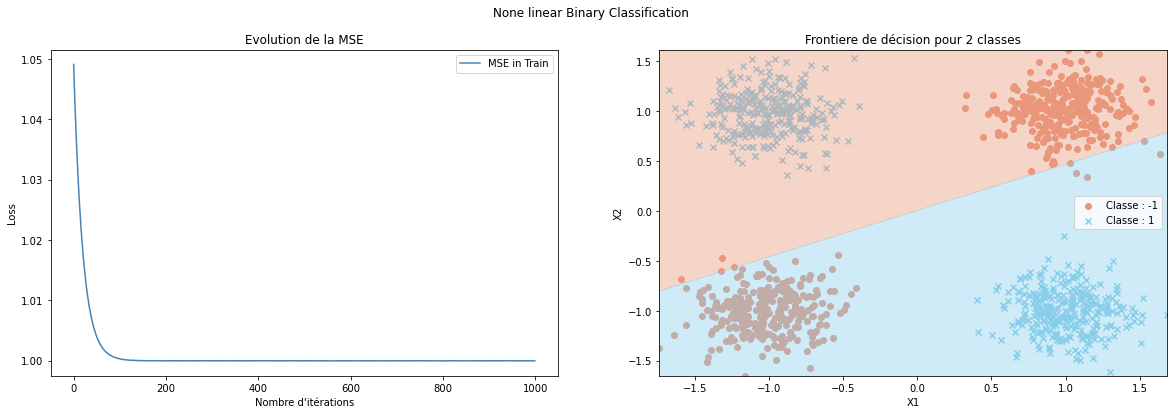

Accuracy : 0.49916666666666665


In [7]:
X, y = generate_data_gauss(300, [[-1, -1], [1, 1], [-1, 1], [1, -1]], [[[0.05, 0], [0, 0.05]]] * 4, labels=[-1, -1, 1, 1])

net = Sequentiel([
    Linear(2, 1, bias=True)
], classes_type="-1/1")

optim = Optim(net, MSELoss(), eps=1e-5)
optim.SGD(X, y, batch_size=60, epochs=1000, verbose=False)

plot_net(X, y, net, optim.train_loss, test_loss=optim.test_loss, net_type="classif", net_title="None linear Binary Classification", loss_name="MSE", data_xlabel="X1", data_ylabel="X2")
print("Accuracy :", accuracy(net, X, y))